In [1]:
include("three-level.jl")
using PyPlot
using BenchmarkTools
using OrdinaryDiffEq

In [2]:
function sim_raman(::Type{T}, npoints=1001; kws...) where T
    sys = T(1, 1, 1, 1, -100, -100, 100, 100, 5000)
    ts, ψs = evolve(sys, npoints; kws...)
end

sim_raman (generic function with 2 methods)

In [3]:
ts1, ψs1 = sim_raman(LabBasisCalc)

([0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0  …  4955.0, 4960.0, 4965.0, 4970.0, 4975.0, 4980.0, 4985.0, 4990.0, 4995.0, 5000.0], ComplexF64[1.0 + 0.0im 0.9997970123123936 + 0.012509734662921735im … 0.99371568469667 - 0.07909632512175295im 0.9954978547211446 - 0.0667577107196703im; 0.0 + 0.0im 0.00935701282237555 + 0.002323331204450315im … 0.0016089372937246867 + 0.004507992017224343im 0.00978030571224267 - 0.0008259122864301786im; 0.0 + 0.0im -0.0002029876876068813 + 0.012509734662921735im … -0.006284315303343525 - 0.07909632512175295im -0.0045021452788691655 - 0.0667577107196703im])

In [4]:
ts2, ψs2 = sim_raman(RotBasisCalc, alg=Vern9())

([0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0  …  4955.0, 4960.0, 4965.0, 4970.0, 4975.0, 4980.0, 4985.0, 4990.0, 4995.0, 5000.0], ComplexF64[1.0 + 0.0im 0.9997961614493862 + 0.01250962853074672im … 0.9930330088027972 - 0.07913197507651581im 0.9948153146967924 - 0.06680162905491838im; 0.0 + 0.0im 0.00935690169487282 + 0.002323377059545462im … 0.0015446981233098473 + 0.004460091814095845im 0.009708447494013167 - 0.0008696643370308967im; 0.0 + 0.0im -0.00020300787358054108 + 0.012509679146414697im … -0.006313527633235144 - 0.0790860925630876im -0.004530547660663251 - 0.0667557000707507im])

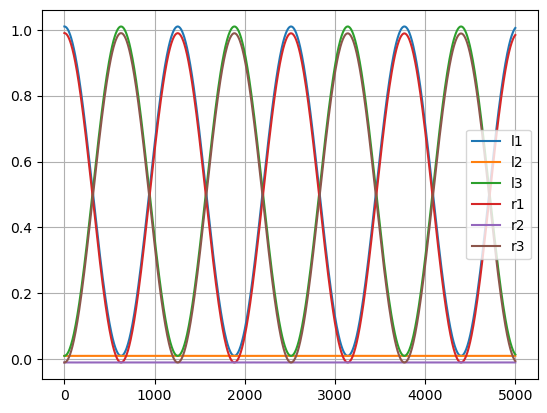

In [5]:
plot(ts1, abs2.(ψs1)' .+ 0.01, label=["l1", "l2", "l3"])
plot(ts2, abs2.(ψs2)' .- 0.01, label=["r1", "r2", "r3"])
legend()
grid()

In [6]:
@btime sim_raman(LabBasisCalc)
@btime sim_raman(LabBasisCalc, 2)
@btime sim_raman(LabBasisCalc, alg=Vern7())
@btime sim_raman(LabBasisCalc, 2, alg=Vern7())
@btime sim_raman(LabBasisCalc, alg=Vern9())
@btime sim_raman(LabBasisCalc, 2, alg=Vern9())

  405.160 ms (3141 allocations: 254.86 KiB)
  401.324 ms (129 allocations: 8.44 KiB)
  369.723 ms (17151 allocations: 1021.25 KiB)
  369.010 ms (153 allocations: 9.97 KiB)
  332.635 ms (25157 allocations: 1.43 MiB)
  330.925 ms (167 allocations: 10.95 KiB)


([0.0, 5000.0], ComplexF64[1.0 + 0.0im 0.9954730701739433 - 0.06680225155286235im; 0.0 + 0.0im 0.009711759503825641 - 0.0008707828392829212im; 0.0 + 0.0im -0.004526929826071323 - 0.06680225155286235im])

In [7]:
@btime sim_raman(RotBasisCalc, maxiters=1e8)
@btime sim_raman(RotBasisCalc, 2, maxiters=1e8)
@btime sim_raman(RotBasisCalc, alg=Vern7(), maxiters=1e8)
@btime sim_raman(RotBasisCalc, 2, alg=Vern7(), maxiters=1e8)
@btime sim_raman(RotBasisCalc, alg=Vern9())
@btime sim_raman(RotBasisCalc, 2, alg=Vern9())

  1.039 s (22309 allocations: 664.33 KiB)
  1.068 s (182 allocations: 9.97 KiB)
  738.314 ms (36318 allocations: 1.40 MiB)
  738.121 ms (205 allocations: 11.50 KiB)
  676.623 ms (44305 allocations: 1.82 MiB)
  671.228 ms (200 allocations: 11.69 KiB)


([0.0, 5000.0], ComplexF64[1.0 + 0.0im 0.9948153146967924 - 0.06680162905491838im; 0.0 + 0.0im 0.009708447494013167 - 0.0008696643370308967im; 0.0 + 0.0im -0.004530547660663251 - 0.0667557000707507im])